In [1]:
from fastai.vision.all import *

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mri-test-tumor/images.jpeg
/kaggle/input/mri-test-tumor/images (1).jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/bra

In [3]:
path = Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection')


In [4]:
fns = get_image_files(path)
fns

(#506) [Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg'),Path('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg')...]

In [5]:
failed = verify_images(fns)
failed
# if failed then delete failed
#failed.map(Path.unlink)

(#0) []

In [6]:
??verify_images

In [7]:
brains = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [8]:
#By default, it Resize crops the images. 
#You can alternatively squish the images
#brains = brains.new(item_tfms=Resize(128, ResizeMethod.Squish))

#You can also do data augmentation,
brains = brains.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))

dls = brains.dataloaders(path)
dls

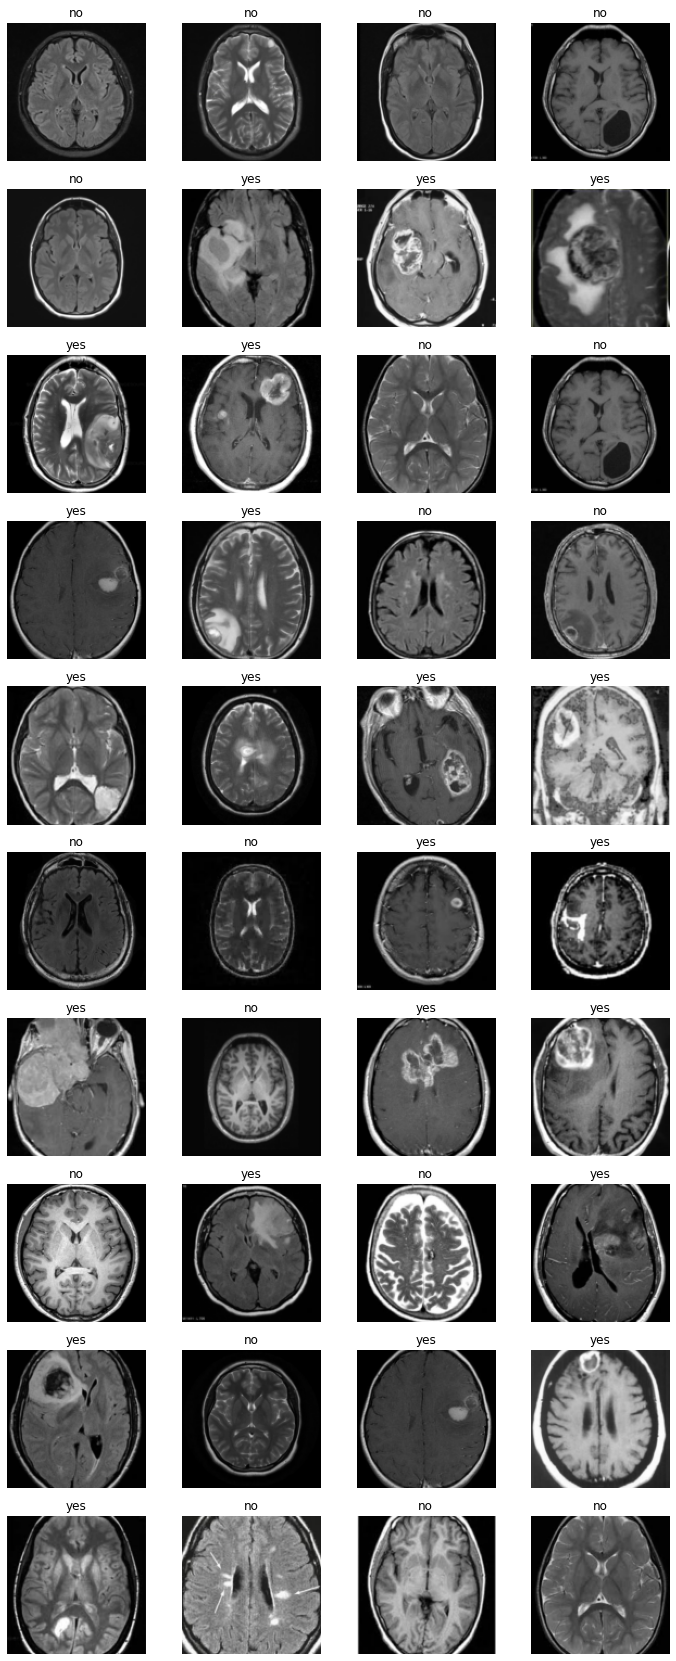

In [9]:
dls.valid.show_batch( max_n=40, nrows=10)

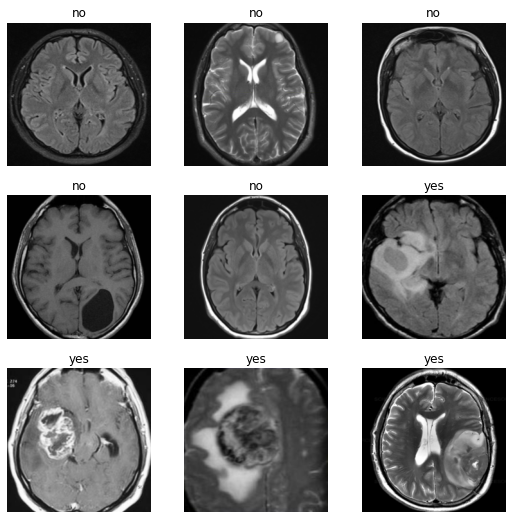

In [10]:
#Now we will train using our data
brains = brains.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    #batch_tfms=aug_transforms()
)

dls = brains.dataloaders(path)
dls.valid.show_batch()

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.042392,0.637828,0.207921,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.677533,0.438548,0.178218,00:02
1,0.530228,0.175389,0.099010,00:02
2,0.423036,0.102798,0.029703,00:03
3,0.347669,0.084880,0.049505,00:03


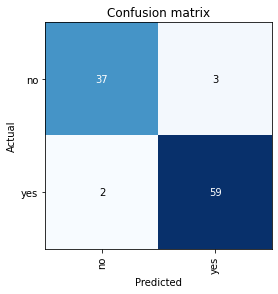

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
#learn.predict('/kaggle/input/mri-test-tumor/images.jpeg')
learn.predict('/kaggle/input/mri-test-tumor/images (1).jpeg')

('yes', TensorBase(1), TensorBase([0.4273, 0.5727]))

In [14]:
learn.dls.vocab

['no', 'yes']